In [0]:
!pip install tensorflow==2.0.0
!pip install scipy
!pip install numpy
!pip install keras==2.3.0

In [197]:
import keras
import tensorflow
print(keras.__version__)
print(tensorflow.__version__)

2.3.0
2.0.0


In [0]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [0]:
import os
os.chdir("/content/drive/My Drive/Diabetes detection/")

In [0]:
dataset = loadtxt("/content/drive/My Drive/Diabetes detection/pima-indians-diabetes.txt", delimiter= ",")

In [0]:
X = dataset[:,0:8]
Y = dataset[:,8]

In [0]:
model = Sequential()
model.add(Dense(20, input_dim = 8, activation= 'relu'))
model.add(Dense(14, activation= 'relu'))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [215]:
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_61 (Dense)             (None, 14)                294       
_________________________________________________________________
dense_62 (Dense)             (None, 10)                150       
_________________________________________________________________
dense_63 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_64 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 9         
Total params: 793
Trainable params: 793
Non-trainable params: 0
_______________________________________________________

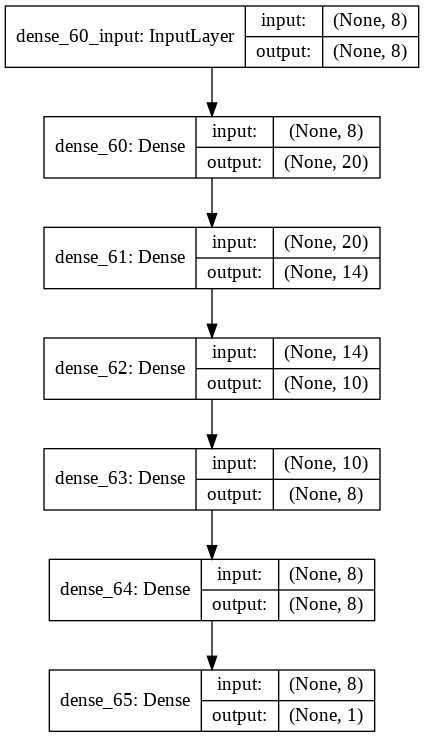

In [216]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
opt = keras.optimizers.Adam(learning_rate= 0.001)

In [0]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [219]:
history = model.fit(X,Y,epochs=2000, batch_size=20)

Epoch 1/2000
768/768 [==============================] - 0s 229us/step - loss: 4.1047 - accuracy: 0.6497
Epoch 2/2000
768/768 [==============================] - 0s 63us/step - loss: 0.6950 - accuracy: 0.6380
Epoch 3/2000
768/768 [==============================] - 0s 72us/step - loss: 0.6499 - accuracy: 0.6836
Epoch 4/2000
768/768 [==============================] - 0s 62us/step - loss: 0.6420 - accuracy: 0.6641
Epoch 5/2000
768/768 [==============================] - 0s 66us/step - loss: 0.6353 - accuracy: 0.6693
Epoch 6/2000
768/768 [==============================] - 0s 62us/step - loss: 0.6310 - accuracy: 0.6706
Epoch 7/2000
768/768 [==============================] - 0s 65us/step - loss: 0.6339 - accuracy: 0.6615
Epoch 8/2000
768/768 [==============================] - 0s 65us/step - loss: 0.6193 - accuracy: 0.6784
Epoch 9/2000
768/768 [==============================] - 0s 65us/step - loss: 0.6185 - accuracy: 0.6797
Epoch 10/2000
768/768 [==============================] - 0s 63us/step - 

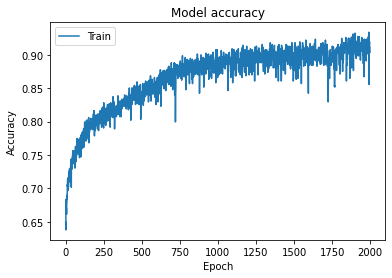

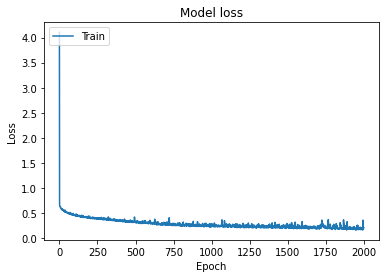

In [220]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [221]:
_,accuracy = model.evaluate(X,Y)
print("Accuracy:" , accuracy)

768/768 [==============================] - 0s 41us/step
Accuracy: 0.9205729365348816


In [0]:
predictions = model.predict_classes(X)

In [223]:
for i in range(10):
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 1 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 1 (expected 1)
